# 네이버 검색 결과 가져오기

> 웹크롤링 데이터
* 블로그 제목
* 블로그 링크
* 등록일자
* 블로그 내용

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from bs4 import BeautifulSoup
from urllib.request import urlopen

## 1. 네이버 홈페이지 접근 및 검색어 입력

####  
### 1) Selenium을 이용해 네이버에 접근

In [2]:
from selenium import webdriver


web_crawling = webdriver.Chrome("./chromedriver")

web_crawling.get('https://www.naver.com/')

### 2) 검색어 입력

#### 검색어 입력에 대한 해당하는 곳을 찾는다 .(find_element_by_name)
#### 찾은 후 미리 정의해 놓은 'search_word' 변수를 이용해 검색어를 입력한다.

In [3]:
search_word = '빅데이터'
web_crawling.find_element_by_name('query').send_keys(search_word)

#### css_selector를 사용해 찾을 수도 있다.(마우스 우클릭 -> copy -> copy selector)  : #query

In [3]:
search_word = '빅데이터'
web_crawling.find_element_by_css_selector('#query').send_keys(search_word)

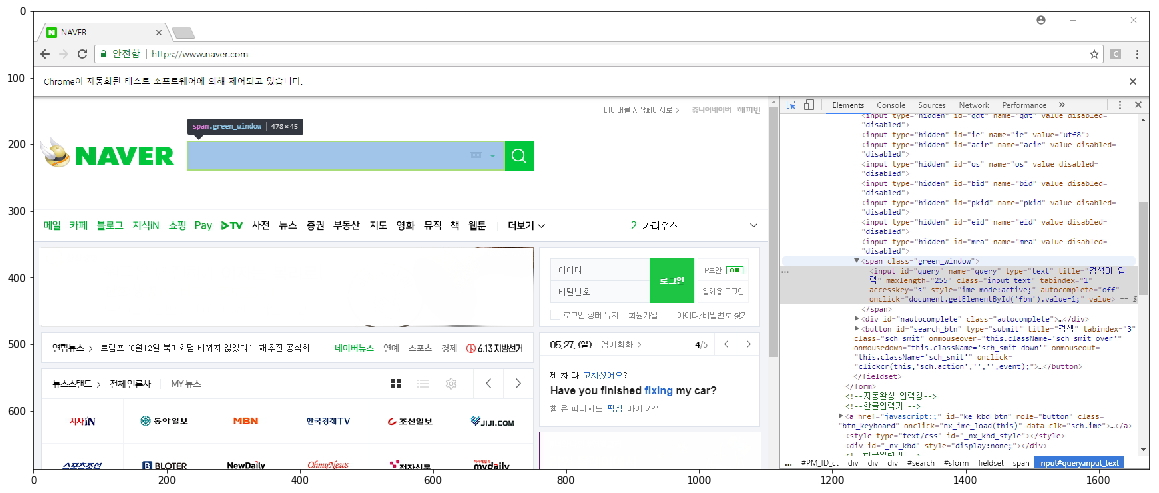

In [4]:
img = imread('search1.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

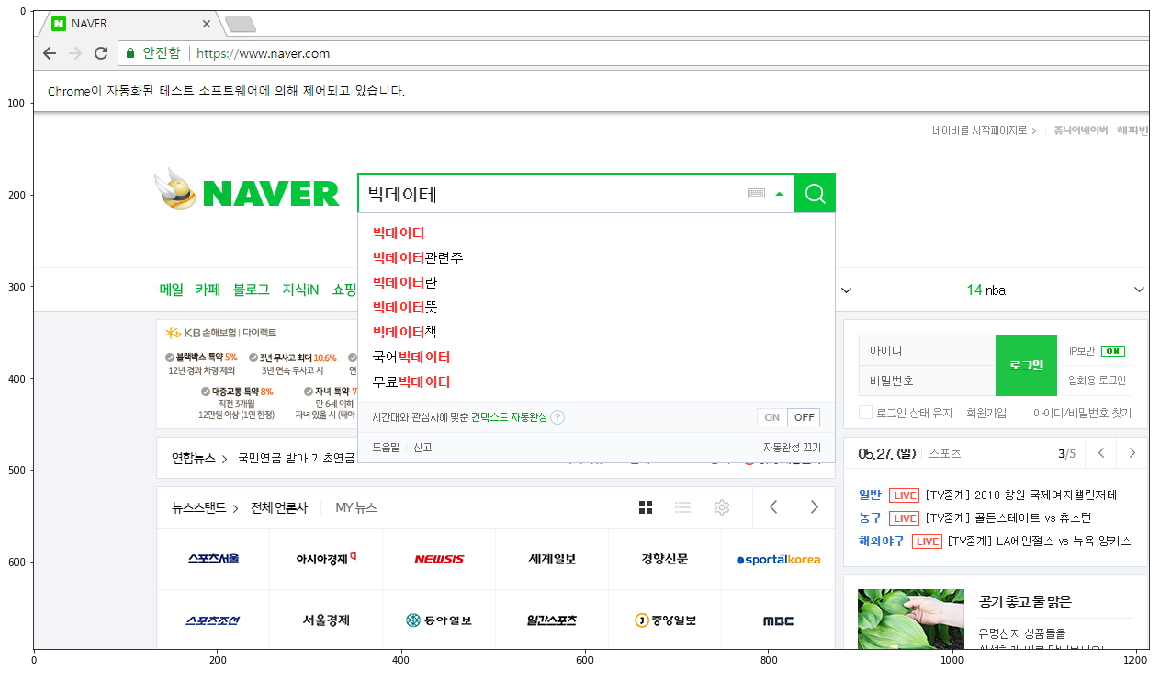

In [5]:
img = imread('search3.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

####   
###  3) 검색 버튼 눌러서 검색

#### 검색어 버튼에 해당하는 부분을 찾느다.(find_element_by_id)
#### 검색버튼을 누른다.(submit)

In [4]:
auto_search = web_crawling.find_element_by_id('search_btn')
auto_search.submit()

#### 이 부분도 css_selector를 찾아도 된다. :  #search_btn 
#### 검색버튼은 click으로도 가능하다.

In [6]:
auto_search = web_crawling.find_element_by_css_selector('#search_btn').click()

### 4) 검색 결과 중 블로그만 보기

#### '블로그' 탭 누르기

In [5]:
all_tab = web_crawling.find_element_by_id('lnb')
blog = all_tab.find_element_by_class_name('lnb3') 
blog.click()

#### 아래 css_selector로도 가능. 최소 'li.lnb3'까지는 가주어야 블로그 탭을 누를 수 있다. 

In [8]:
web_crawling.find_element_by_css_selector('#lnb > div > div.lnb_menu > ul > li.lnb3 > a > span').click()

In [9]:
web_crawling.find_element_by_css_selector('#lnb > div > div.lnb_menu > ul > li.lnb3 > a').click()

In [14]:
web_crawling.find_element_by_css_selector('#lnb > div > div.lnb_menu > ul > li.lnb3').click()

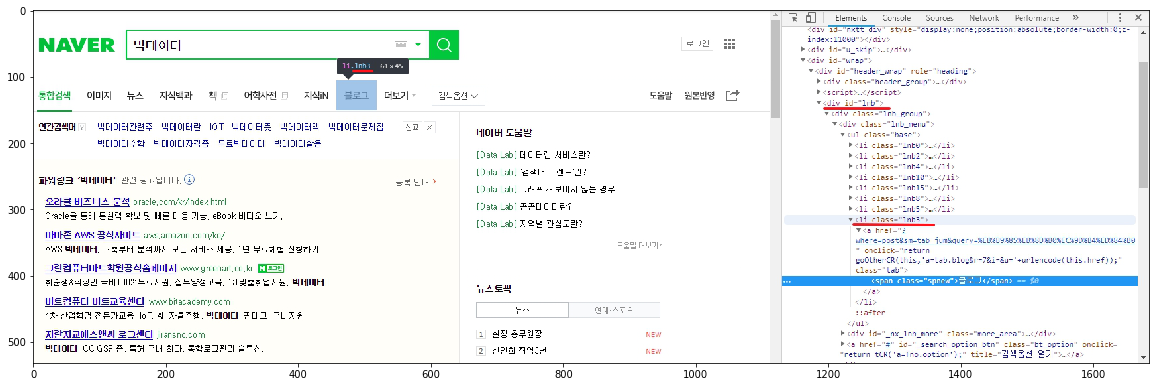

In [7]:
img = imread('search4.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

### 5) 정보 가져오기 
* 블로그 제목
* 블로그 링크
* 등록일자
* 블로그 내용

#### 웹페이지 소스를 가져온다. html로 파싱

In [105]:
html = web_crawling.page_source 

In [39]:
html[:1000]

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/68.0.3440.106 safari/537.36" data-platform="win32"><head> <meta charset="utf-8" /> <meta name="referrer" content="always" />  <meta name="format-detection" content="telephone=no,address=no,email=no" /> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0" /> <meta property="og:title" content="빅데이터 : 네이버 블로그검색" /> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" /> <meta property="og:description" content="\'빅데이터\'의 네이버 블로그검색 결과입니다." /> <meta name="description" lang="ko" content="\'빅데이터\'의 네이버 블로그검색 결과입니다." /> <title>빅데이터 : 네이버 블로그검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico" />  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/

In [106]:
soup = BeautifulSoup(html, 'html.parser')  

In [100]:
type(soup)

bs4.BeautifulSoup

####   
#### 블로그 제목

In [43]:
blog_titles = soup.select('.sh_blog_title')

In [46]:
for n in blog_titles:            
    print(n.text)

[Industry 4.0] Part3 빅데이터, 한 길 사람 속은 몰라도 만명...
[ 빅데이터, 공장을 변하게 하다 ]
빅데이터학원 다녀온 후기!!
빅데이터·AI·수소경제 인프라 깐다는데...규제는 여전히...
K-ICT 빅데이터센터 현장견학 총정리 <빅데이터...
클릭 하나로 내 삶의 에너지가 되는 ‘빅데이터의 활용’
[주얼리 빅데이터] 7월 소셜... 트위터, 뉴스 등 빅데이터 분석
[I LOVE KISTI] 자폐증 규명의 구심점 ‘바이오 빅데이터...
[여행 빅데이터] 韓 여행객이 방문하고 싶은 미식 도시 톱3
<빅데이터마케팅>클라우드 사업-4찬산업 핵심


####  
#### 블로그 링크

In [86]:
blog_link = soup.select('dl > dd.txt_block > span > a.url')

In [93]:
for n in blog_link:            
    print(n.text)

www.fashionseoul.com/154341
blog.naver.com/nese119/221316312034
blog.naver.com/qorgh...
blog.naver.com/siyungj/221338189096
blog.naver.com/eh_071220/221338952457
blog.naver.com/i_lov...
blog.naver.com/wjrc1858/221338810090
blog.naver.com/withkisti/221329303654
blog.naver.com/the_t...
leeconan.com/221338233392


####   
#### 등록일자


In [48]:
blog_date = soup.select('.txt_inline')

In [51]:
for n in blog_link:            
    print(n.text)

2018.07.27. 
2018.07.10. 
2018.07.26. 
3일 전 
2일 전 
2018.08.08. 
2일 전 
2018.07.30. 
2018.08.01. 
3일 전 


####   
#### 블로그 내용


In [55]:
blog_text = soup.select('.sh_blog_passage')

In [59]:
for n in blog_text:            
    print(n.text)
    print("")

필자는 2천년대 초반, ‘빅데이터’라는 단어가 나오기 전부터 ‘데이터’ 분야에서 일을 했다. 금융 산업과 같이 오래전부터 데이터가 중요한 산업들도 있지만...

생산하는 데이터의 양이 많고, 불량률이나 수율, 투입 비용 등 적용 효과를 계량화하기가 쉬우므로 빅데이터 시대 초반부터 이를 활용해 비용을 줄인 사례가...

파이썬은 차후에 웹상에서 데이터들을 끌어올 때 쓰는 프로그래밍언어라 당장에... 괜찮은 빅.데.이.터.학.원이라 생각했어요. 빅데이터 과정뿐만 아니라, IT 쪽의...

이 과정에서 블록체인 기술을 접목해 데이터 저장 보안성과 거래 신뢰성을 높인다. 빅데이터 기술 관리를 위한 고성능 컴퓨팅, 알고리즘 개발 등을 위한 범용 AI...

고용노동부가 주관하고 한국경제신문이 운영하는 청년취업아카데미 <빅데이터... K-ICT 빅데이터센터에 방문했다. (교육 내용은 마지막에 있습니다.) 저 곳이 바로...

정보산업시대의 원유 ‘빅데이터’ 이처럼 데이터는 4차 산업혁명 시대에서 매우 중요한 부분이 되었습니다. 특히 상업적으로는 데이터를 활용하는 것이 생존을 위한...

[빅데이터_마케팅 리포트] → #빅데이터 #주얼리데이터 #7월 #키워드 #여름키워드 #쥬얼리 #주얼리 #다이아몬드 #리포트 #귀걸이 2018년 7월 주얼리 Social 빅데이터 분석...

자폐증 규명의 구심점 ‘바이오 빅데이터 기반의 생물학 연구’ 기초과학연구원... 그런데 생물정보학 분석기법을 활용한 결과, 데이터를 통해 그 패턴을 발견하게...

[여행 빅데이터] 韓 여행객이 방문하고 싶은 미식 도시 톱3 안녕하세요. 여플(여행+) 장주영 에디터입니다. 여러분은 ‘왜’ ‘무슨 이유로’ 여행을 떠나시나요?...

무엇보다 이렇게 확보된 사용자들의 데이터가 모여서 "빅데이터"를 넘어 "메타데이터"가 된 순간 거대IT기업들은 <컨텐츠마케팅>을 하며 무형의 부가가치를 통해서...



####   

#### 링크의 경우 text로 가져오기 한계가 있음. 다른 방식을 사용해야함.

####     
#### 다시 웹페이지를 가져온다. 이번엔 lxml로 파싱한다.

In [94]:
html = web_crawling.page_source 

In [95]:
html[:500]

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/68.0.3440.106 safari/537.36" data-platform="win32"><head> <meta charset="utf-8" /> <meta name="referrer" content="always" />  <meta name="format-detection" content="telephone=no,address=no,email=no" /> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0" /> <meta property="og:title" content="빅'

In [101]:
soup = BeautifulSoup(html, 'lxml')

In [102]:
type(soup)

bs4.BeautifulSoup